# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
database = pd.read_csv("/home/apprenant/Documents/brief_foodflix/en.openfoodfacts.org.products.tsv", delimiter='\t', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Sélection des colonnes utiles pour l'étude

In [4]:
nutriscore_cols=[
    'product_name', 
    'generic_name', 
    'brands',
    'categories',
    'countries', 
    'nutrition_grade_fr', 
    'energy_100g', 
    'energy-from-fat_100g', 
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'fiber_100g', 
    'proteins_100g', 
    'salt_100g', 
    'sodium_100g', 
    'fruits-vegetables-nuts_100g', 
    'nutrition-score-fr_100g', 
    'nutrition-score-uk_100g' 
        ]

In [5]:
nutriscore_table = database[nutriscore_cols].copy()
nutriscore_table.head()

,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,d,2243.0,NaN,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,NaN,14.0,14.0
2,Peanuts,NaN,Torn & Glasser,NaN,US,b,1941.0,NaN,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,NaN,0.0,0.0
3,Organic Salted Nut Mix,NaN,Grizzlies,NaN,US,d,2540.0,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,12.0,12.0
4,Organic Polenta,NaN,Bob's Red Mill,NaN,US,NaN,1552.0,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN


In [6]:
nutriscore_table.shape

(356027, 19)

## Sélection des données de produits vendus en France

In [7]:
print(nutriscore_table['countries'].isnull().sum())

275


In [8]:
nutriscore_table = nutriscore_table[nutriscore_table['countries'].notna()]

In [9]:
nutriscore_table.shape

(355752, 19)

In [10]:
print(len(nutriscore_table['countries'].unique()))

1637


In [11]:
list_countries = nutriscore_table['countries'].unique()

In [12]:
list_countries

array(['en:FR', 'US', 'France', ..., 'Malaisie', 'en:HK, en:france',
       'Hong Kong,China'], dtype=object)

In [13]:
kept_countries = []
search = 'france'
second_search = 'FR'
for element in list_countries:
    #print(element, type(element))
    if search in element.lower() or second_search in element:
        kept_countries.append(element)

print(kept_countries)

['en:FR', 'France', 'France,États-Unis', 'France, US', 'France,Royaume-Uni', 'Belgique,France,Pays-Bas,Royaume-Uni', 'France,Belgique,Pays-Bas,Royaume-Uni', 'France,United Kingdom', 'UK,France', 'France,UK', 'Royaume-Uni,France', 'en:FR,France', 'en:AU, en:france', 'France,Suisse,États-Unis,Canada', 'France,United States', 'en:RE, en:france', 'France,Allemagne', 'Belgique,France', 'en:FR, US', 'United States, en:france', 'en:IQ,France', 'France, Suisse', 'en:FR, Suisse', 'France,Polynésie française', 'en:US, en:france', 'US,France', 'Netherlands,France', 'France,Canada', 'France,États-Unis,Suisse', 'France,Italie', 'United States,France', 'United Kingdom, en:france', 'Belgique, en:france', 'United Kingdom,France', 'en:BE,France', 'France,United Kingdom,United States', 'en:US,France', 'United States, en:france, en:switzerland', 'France,Switzerland', 'Australia,France,United Kingdom', 'France,United Kingdom, US', 'France,Belgique,Royaume-Uni,Pays-Bas', 'France,Royaume-Uni,États-Unis', 'e

In [14]:
print(len(kept_countries))

705


In [15]:
nutriscore_table = nutriscore_table.loc[nutriscore_table['countries'].isin(kept_countries)]

In [16]:
nutriscore_table.shape

(128909, 19)

In [17]:
nutriscore_table.head()

,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Naturablue original,NaN,Natura4ever,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Filet de bœuf,NaN,NaN,Filet de bœuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Naturakrill original,NaN,Natura4ever,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Valeurs manquantes - values_100g

In [19]:
values_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g']

In [20]:
nutriscore_table['Missing_100g'] = nutriscore_table[values_100g].isnull().sum(axis=1)

In [21]:
nutriscore_table.head()

,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Missing_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
46,Naturablue original,NaN,Natura4ever,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
47,Filet de bœuf,NaN,NaN,Filet de bœuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
49,NaN,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
51,Naturakrill original,NaN,Natura4ever,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [22]:
nutriscore_table = nutriscore_table.loc[nutriscore_table['Missing_100g'] < 9]

In [23]:
nutriscore_table.shape

(97036, 20)

In [24]:
nutriscore_table.head()

,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Missing_100g
140,Pack de 2 Twix,NaN,"Twix, Lundberg",NaN,"France, US",NaN,1481.0,NaN,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,5
185,Root Beer,NaN,A&W,"Boissons,Boissons gazeuses,Sodas,Boissons sucr...",France,e,215.0,NaN,0.00,0.0,14.20,13.6,0.0,0.00,0.0616,0.024200,NaN,18.0,3.0,1
189,"Gotta-have grape, seriously strawberry flavor",Bonbons acidulés Raisin Fraise,Nerds,"Snacks sucrés,Confiseries,Bonbons",France,d,1667.0,NaN,0.00,0.0,93.30,93.3,NaN,0.00,0.0000,0.000000,NaN,14.0,14.0,2
190,Thé noir aromatisé violette et fleurs,NaN,Alice Délice,en:beverages,France,c,17.0,NaN,0.10,0.1,0.10,0.1,NaN,0.10,0.0010,0.000394,NaN,2.0,0.0,2
193,Preparation mug cake chocolat-caramel au beurr...,NaN,Alice Délice,NaN,France,e,1632.0,NaN,7.00,4.5,70.00,42.0,0.0,7.00,0.9750,0.383858,NaN,21.0,21.0,1


## Vérification si les colonnes sont vides et si oui, suppression

In [25]:
nutriscore_table.dropna(how='all', axis=1, inplace=True)
nutriscore_table.shape

(97036, 20)

Pas de colonne entièrement vide

## Traitement des doublons

In [26]:
print(nutriscore_table.duplicated().value_counts())

False    96863
True       173
dtype: int64


In [27]:
duplicated_rows = nutriscore_table[nutriscore_table.duplicated(keep=False)]
duplicated_rows.head(10)

,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Missing_100g
19719,Crème de marrons de l'Ardèche,Crème de marrons,Clément Faugier,"Aliments et boissons à base de végétaux,Alimen...",France,d,1147.0,NaN,0.8,0.2,63.6,50.2,1.9,1.3,0.01,0.003937,NaN,11.0,11.0,1
19721,Crème de marrons de l'Ardèche,Crème de marrons,Clément Faugier,"Aliments et boissons à base de végétaux,Alimen...",France,d,1147.0,NaN,0.8,0.2,63.6,50.2,1.9,1.3,0.01,0.003937,NaN,11.0,11.0,1
28678,Double Chocolate Mini Bites,NaN,M&S,NaN,"France,United Kingdom",e,1962.0,NaN,NaN,15.1,NaN,46.0,2.1,5.8,0.23,0.090551,NaN,24.0,24.0,3
102742,Double Chocolate Mini Bites,NaN,M&S,NaN,"France,United Kingdom",e,1962.0,NaN,NaN,15.1,NaN,46.0,2.1,5.8,0.23,0.090551,NaN,24.0,24.0,3
114790,Les milanaises,NaN,Le Gaulois,NaN,France,a,506.0,NaN,0.8,0.0,5.8,1.9,0.7,22.0,0.70,0.275591,NaN,-1.0,-1.0,1
115270,Chateaubriand,NaN,Charal,NaN,France,a,473.0,NaN,NaN,0.8,NaN,0.0,0.0,23.0,0.17,0.066929,NaN,-4.0,-4.0,3
115271,Chateaubriand,NaN,Charal,NaN,France,a,473.0,NaN,NaN,0.8,NaN,0.0,0.0,23.0,0.17,0.066929,NaN,-4.0,-4.0,3
115613,Saint Albray,NaN,Saint Albray,NaN,France,e,1331.0,NaN,26.0,18.0,0.5,0.5,NaN,21.0,1.50,0.590551,NaN,19.0,19.0,2
115614,Saint Albray,NaN,Saint Albray,NaN,France,e,1331.0,NaN,26.0,18.0,0.5,0.5,NaN,21.0,1.50,0.590551,NaN,19.0,19.0,2
176453,Lentilles vertes,NaN,Golden Sun,Lentilles vertes,France,a,1292.0,NaN,1.1,0.2,37.0,2.0,NaN,25.8,0.02,0.007874,NaN,-2.0,-2.0,2


In [28]:
nutriscore_table=nutriscore_table.drop_duplicates()

In [29]:
nutriscore_table.shape

(96863, 20)

## Nombre de valeurs manquantes par colonne restante

In [30]:
print(nutriscore_table.isnull().sum())

product_name                     410
generic_name                   61325
brands                           634
categories                     34352
countries                          0
nutrition_grade_fr              4046
energy_100g                      667
energy-from-fat_100g           96826
fat_100g                       16116
saturated-fat_100g              2513
carbohydrates_100g             16524
sugars_100g                     2407
fiber_100g                     32561
proteins_100g                    831
salt_100g                       2354
sodium_100g                     2358
fruits-vegetables-nuts_100g    93731
nutrition-score-fr_100g         4046
nutrition-score-uk_100g         4046
Missing_100g                       0
dtype: int64


## Traitement des valeurs manquantes - name/generic name

In [31]:
nutriscore_test = nutriscore_table.copy()

In [32]:
nutriscore_test['product_name'] = nutriscore_test['product_name'].apply(
    lambda x: nutriscore_test['generic_name'] if x=='NaN' else x
)

In [33]:
nutriscore_test.shape

(96863, 20)

In [34]:
nutriscore_test = nutriscore_test[nutriscore_test['product_name'].notna()]

In [35]:
nutriscore_test.shape

(96453, 20)

In [36]:
nutriscore_table = nutriscore_test.copy()

## Corrélation entre les colonnes

In [39]:
nutriscore_table.corr()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Missing_100g
energy_100g,1.000000,0.640159,0.776582,0.567098,0.485184,0.307046,-0.003499,0.211090,-0.027142,-0.027139,-0.272645,0.587973,0.675991,0.017711
energy-from-fat_100g,0.640159,1.000000,0.689998,0.553390,0.110796,0.151631,0.004924,0.447726,0.196611,0.196691,-1.000000,0.343974,0.388750,0.087033
fat_100g,0.776582,0.689998,1.000000,0.724849,-0.090027,-0.036240,-0.003064,0.137341,0.004367,0.004363,-0.250439,0.529733,0.632794,0.081649
saturated-fat_100g,0.567098,0.553390,0.724849,1.000000,-0.039175,0.060204,-0.001836,0.139427,0.005188,0.005185,-0.265983,0.587735,0.641798,0.089189
carbohydrates_100g,0.485184,0.110796,-0.090027,-0.039175,1.000000,0.653833,-0.003228,-0.138310,-0.077516,-0.077509,-0.080301,0.226778,0.229066,-0.072572
sugars_100g,0.307046,0.151631,-0.036240,0.060204,0.653833,1.000000,-0.000511,-0.245223,-0.088685,-0.088684,0.101763,0.436599,0.404932,0.037663
fiber_100g,-0.003499,0.004924,-0.003064,-0.001836,-0.003228,-0.000511,1.000000,-0.003094,-0.000106,-0.000106,-0.028896,-0.002484,-0.002234,-0.002078
proteins_100g,0.211090,0.447726,0.137341,0.139427,-0.138310,-0.245223,-0.003094,1.000000,0.083220,0.083220,-0.310506,0.079245,0.150111,0.060880
salt_100g,-0.027142,0.196611,0.004367,0.005188,-0.077516,-0.088685,-0.000106,0.083220,1.000000,1.000000,-0.092364,0.113492,0.126442,0.032516
sodium_100g,-0.027139,0.196691,0.004363,0.005185,-0.077509,-0.088684,-0.000106,0.083220,1.000000,1.000000,-0.092364,0.113493,0.126442,0.032585


<AxesSubplot:>

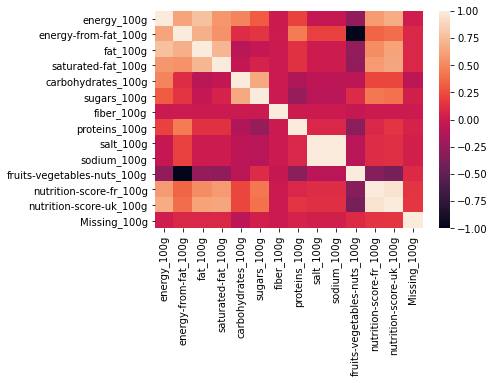

In [40]:
sns.heatmap(nutriscore_table.corr())

Corrélation entre
   - energy_100g et energy-from-fat_100g
   - fat_100g et energy-from-fat_100g
   - fat et saturated-fat
   - saturated-fat et energy
   - saturated-fat et energy-from-fat
   - sugars et carbohydrates
   - salt et sodium

<AxesSubplot:xlabel='energy_100g', ylabel='energy-from-fat_100g'>

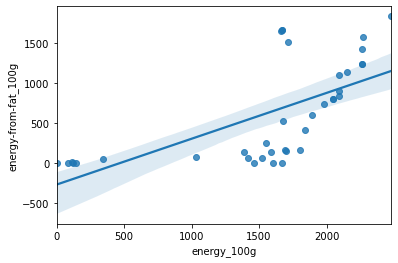

In [43]:
sns.regplot(x='energy_100g' , y='energy-from-fat_100g', data=nutriscore_table)

<AxesSubplot:xlabel='fat_100g', ylabel='energy-from-fat_100g'>

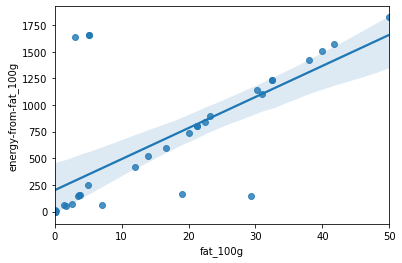

In [44]:
sns.regplot(x='fat_100g' , y='energy-from-fat_100g', data=nutriscore_table)

<AxesSubplot:xlabel='fat_100g', ylabel='saturated-fat_100g'>

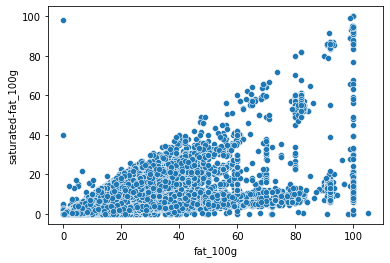

In [55]:
sns.scatterplot(x='fat_100g' , y='saturated-fat_100g', data=nutriscore_table)

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

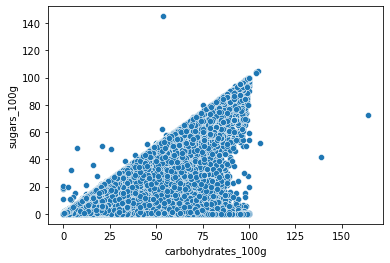

In [54]:
sns.scatterplot(x='carbohydrates_100g' , y='sugars_100g', data=nutriscore_table)

<AxesSubplot:xlabel='salt_100g', ylabel='sodium_100g'>

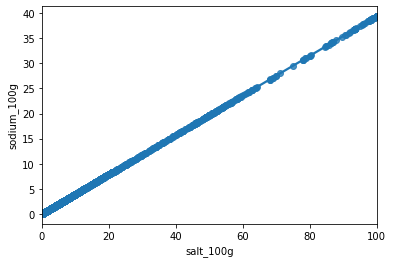

In [48]:
sns.regplot(x='salt_100g' , y='sodium_100g', data=nutriscore_table)

## Valeurs colonne energy

<AxesSubplot:xlabel='energy_100g'>

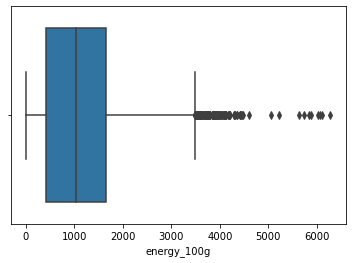

In [49]:
sns.boxplot(x='energy_100g', data=nutriscore_table)

On ne peut pas avoir de données où l'energy est supérieure à 3700 kJ (car 100g de fat apporte 37kJ*100 soit 3700kJ)

In [53]:
nutriscore_table.value_counts(nutriscore_table['energy_100g']>3700)

energy_100g
False    96039
True       414
dtype: int64

In [56]:
nutriscore_table.drop(nutriscore_table[nutriscore_table['energy_100g']>3700].index, inplace=True)

In [57]:
nutriscore_table.shape

(96039, 20)

<AxesSubplot:xlabel='energy_100g'>

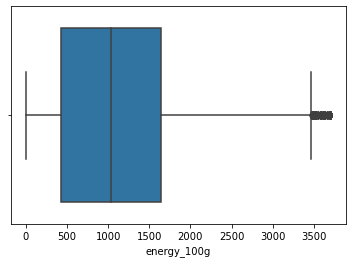

In [58]:
sns.boxplot(x='energy_100g', data=nutriscore_table)

## Distribution des valeurs dans les colonnes values_100g

In [37]:
print(values_100g)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g']


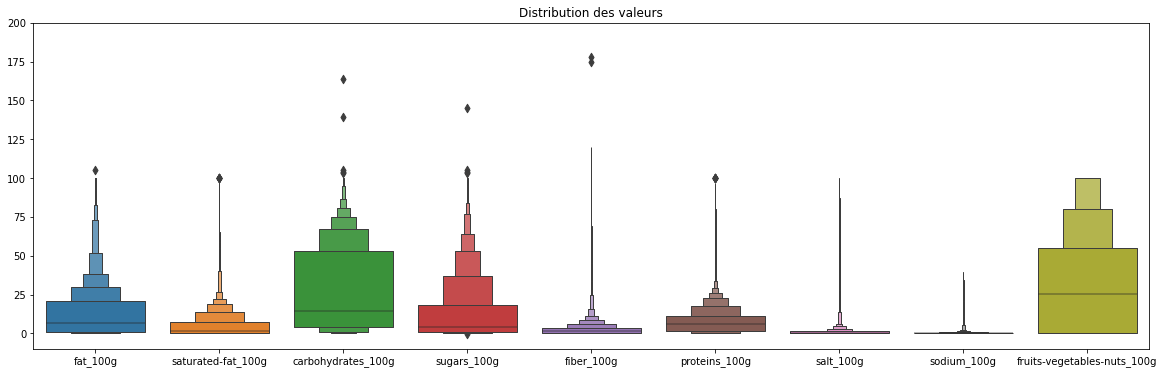

In [59]:
plt.figure(figsize=(20,6))
plt.ylim(-10,200)
plt.title("Distribution des valeurs")
ax = sns.boxenplot(data=nutriscore_table[values_100g])

Toutes les valeurs supérieures à 100g vont devoir être modifiées

In [39]:
print(nutriscore_table[values_100g].isnull().sum())

fat_100g                       16091
saturated-fat_100g              2493
carbohydrates_100g             16499
sugars_100g                     2391
fiber_100g                     32380
proteins_100g                    826
salt_100g                       2343
sodium_100g                     2347
fruits-vegetables-nuts_100g    93323
dtype: int64


In [91]:
nutriscore_test = nutriscore_table.copy()

In [92]:
nutriscore_test = nutriscore_test.drop(nutriscore_test[nutriscore_test['fat_100g']>100].index)

In [93]:
nutriscore_test.shape

(96038, 20)

### Selection des données de values_100g comprises entre 0 et 100

In [94]:
for element in values_100g:
    nutriscore_test = nutriscore_test.drop(nutriscore_test[nutriscore_test[element]>100].index)
nutriscore_test.shape

(96022, 20)

In [95]:
for element in values_100g:
    nutriscore_test = nutriscore_test.drop(nutriscore_test[nutriscore_test[element]<0].index)
nutriscore_test.shape

(96021, 20)

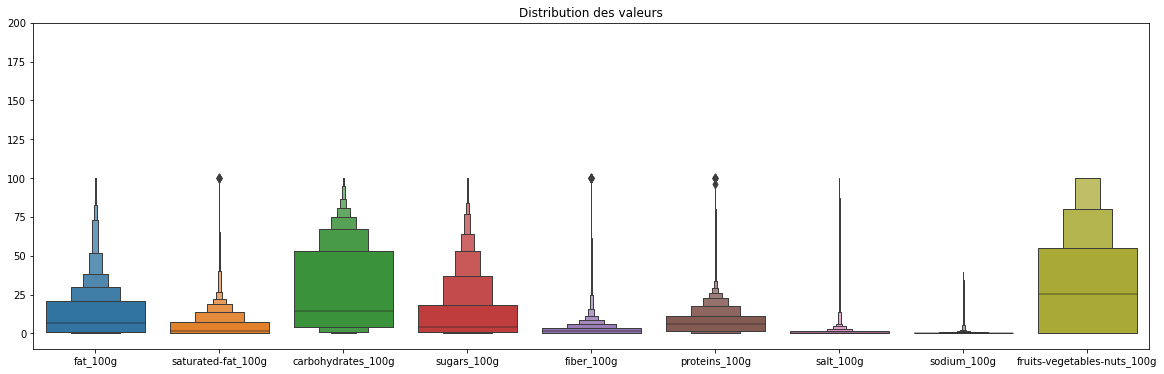

In [96]:
plt.figure(figsize=(20,6))
plt.ylim(-10,200)
plt.title("Distribution des valeurs")
ax = sns.boxenplot(data=nutriscore_test[values_100g])

<AxesSubplot:xlabel='fat_100g', ylabel='saturated-fat_100g'>

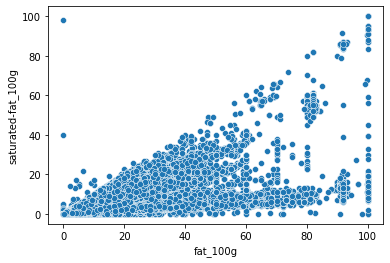

In [97]:
sns.scatterplot(x='fat_100g' , y='saturated-fat_100g', data=nutriscore_test)

In [98]:
nutriscore_test.shape

(96021, 20)

In [99]:
nutriscore_test.loc[nutriscore_test['saturated-fat_100g']>nutriscore_test['fat_100g'], 'fat_100g'] = nutriscore_test['saturated-fat_100g']

In [100]:
nutriscore_test.shape

(96021, 20)

<AxesSubplot:xlabel='fat_100g', ylabel='saturated-fat_100g'>

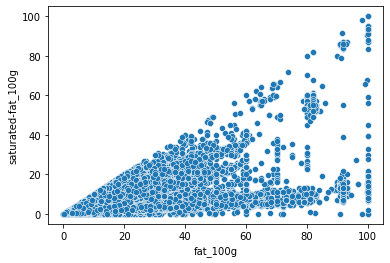

In [101]:
sns.scatterplot(x='fat_100g' , y='saturated-fat_100g', data=nutriscore_test)

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

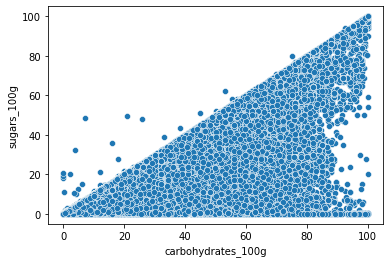

In [73]:
sns.scatterplot(x='carbohydrates_100g' , y='sugars_100g', data=nutriscore_test)

In [102]:
nutriscore_test.loc[nutriscore_test['sugars_100g']>nutriscore_test['carbohydrates_100g'], 'carbohydrates_100g'] = nutriscore_test['sugars_100g']

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

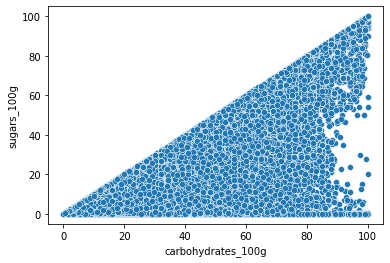

In [103]:
sns.scatterplot(x='carbohydrates_100g' , y='sugars_100g', data=nutriscore_test)

In [129]:
nutriscore_test.shape

(96021, 20)

In [138]:
nutriscore_test.isna().sum()

product_name                       0
generic_name                   60553
brands                           451
categories                     33982
countries                          0
nutrition_grade_fr              4006
energy_100g                      662
energy-from-fat_100g           95984
fat_100g                       15997
saturated-fat_100g              2490
carbohydrates_100g             16399
sugars_100g                     2385
fiber_100g                     32257
proteins_100g                    821
salt_100g                       2336
sodium_100g                     2340
fruits-vegetables-nuts_100g    92896
nutrition-score-fr_100g         4006
nutrition-score-uk_100g         4006
Missing_100g                       0
dtype: int64

## Nutriscore

In [130]:
nutriscore_table=nutriscore_test.copy()

In [131]:
nutrition_table.shape

(96021, 20)

In [132]:
print(nutriscore_table['nutrition-score-fr_100g'].isnull().sum())

4006


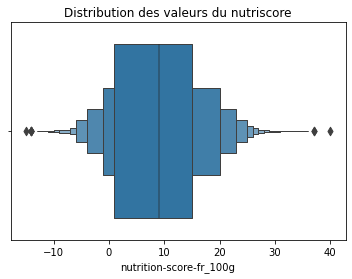

In [133]:
plt.title("Distribution des valeurs du nutriscore")
ax = sns.boxenplot(x=nutriscore_table['nutrition-score-fr_100g'])

## Enregistrement de la base de données nettoyée en csv (version temporaire)

In [ ]:
# Pour enregistrer une version temporaire de la base de données
# j'ai choisi d'enlever les lignes où il n'y a pas de nutriscore

In [134]:
nutriscore_table.shape

(96021, 20)

In [135]:
nutriscore_table = nutriscore_table[nutriscore_table['nutrition-score-fr_100g'].notna()]

In [136]:
nutriscore_table.shape

(92015, 20)

In [71]:
nutriscore_table.to_csv("intermediate.csv")

In [72]:
df = pd.read_csv("intermediate.csv", sep=',', low_memory=False)

In [73]:
df.head()

,Unnamed: 0,product_name,generic_name,brands,categories,countries,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Missing_100g
0,185,Root Beer,NaN,A&W,"Boissons,Boissons gazeuses,Sodas,Boissons sucr...",France,e,215.0,NaN,0.0,0.0,14.2,13.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0616,0.024200,NaN,18.0,3.0,1
1,189,"Gotta-have grape, seriously strawberry flavor",Bonbons acidulés Raisin Fraise,Nerds,"Snacks sucrés,Confiseries,Bonbons",France,d,1667.0,NaN,0.0,0.0,93.3,93.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0000,0.000000,NaN,14.0,14.0,2
2,190,Thé noir aromatisé violette et fleurs,NaN,Alice Délice,en:beverages,France,c,17.0,NaN,0.1,0.1,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.0010,0.000394,NaN,2.0,0.0,2
3,193,Preparation mug cake chocolat-caramel au beurr...,NaN,Alice Délice,NaN,France,e,1632.0,NaN,7.0,4.5,70.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.9750,0.383858,NaN,21.0,21.0,1
4,194,Mini Confettis,NaN,Alice Délice,NaN,France,d,1753.0,NaN,NaN,0.8,NaN,87.7,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.6,0.0100,0.003937,NaN,14.0,14.0,3


In [74]:
df.shape

(92418, 27)

## Calcul du nutriscore quand il est manquant

Nutriscore_test est une copie de nutriscore_table, la database cleané avec les lignes où il y a des nutriscores manquants

In [110]:
nutriscore_test = nutriscore_table.copy()

In [112]:
nutriscore_test.shape

(96021, 20)

In [124]:
nutriscore_test.isna().sum()

product_name                       0
generic_name                   60553
brands                           451
categories                     33982
countries                          0
nutrition_grade_fr              4006
energy_100g                      662
energy-from-fat_100g           95984
fat_100g                       15997
saturated-fat_100g              2490
carbohydrates_100g             16399
sugars_100g                     2385
fiber_100g                     32257
proteins_100g                    821
salt_100g                       2336
sodium_100g                     2340
fruits-vegetables-nuts_100g    92896
nutrition-score-fr_100g         4006
nutrition-score-uk_100g         4006
Missing_100g                       0
dtype: int64

In [113]:
nutriscore_calcul = nutriscore_test.loc[nutriscore_test['nutrition-score-fr_100g'].isnull()]

In [114]:
nutriscore_calcul.shape

(4006, 20)

In [116]:
values = ['fat_100g', 'carbohydrates_100g', 'proteins_100g']

In [118]:
nutriscore_calcul[values].isna().sum()

fat_100g              435
carbohydrates_100g    788
proteins_100g         819
dtype: int64

In [119]:
nutriscore_calcul[values].fillna(0)

,fat_100g,carbohydrates_100g,proteins_100g
140,4.170000,77.08,6.2500
814,0.000000,0.00,0.0000
6731,0.893000,71.40,12.5000
11177,0.800000,10.20,2.0000
11837,0.000000,27.20,0.7000
11872,55.400000,4.60,22.2000
12875,0.000000,100.00,0.0000
13271,0.000000,13.30,0.0000
36044,0.100000,14.00,0.0000
43332,0.000000,0.00,0.0000


In [127]:
def getEnergy(row):
    val = (row['carbohydrates_100g']*17 + row['proteins_100g']*17 + row['fat_100g']*37)
    return val

In [142]:
nutriscore_calcul['energy_calculated']=nutriscore_calcul.apply(getEnergy, axis=1)

<ipython-input-142-3a8fa2cbf39b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutriscore_calcul['energy_calculated']=nutriscore_calcul.apply(getEnergy, axis=1)


In [143]:
other_values = ['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g']

In [144]:
nutriscore_calcul[other_values].fillna(0)

,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g
140,1481.000000,0.000,0.0000,0.000000
814,63.000000,3.000,0.0000,0.000000
6731,1420.000000,0.000,0.0000,0.511811
11177,235.200000,8.200,0.0000,0.034000
11837,444.900000,0.000,0.0000,0.000000
11872,2536.000000,0.000,5.0000,0.014500
12875,1569.000000,100.000,0.0000,0.000000
13271,280.000000,13.300,0.0000,1.730000
36044,256.000000,14.000,0.1000,0.039370
43332,0.000000,0.000,0.0000,33.750000


In [145]:
def getPts(value, level) :
  val = 0
  for i, x in enumerate(level) :
    if int(value) <= int(x) :
      val = i
      break
    return val

<AxesSubplot:xlabel='sodium_100g'>

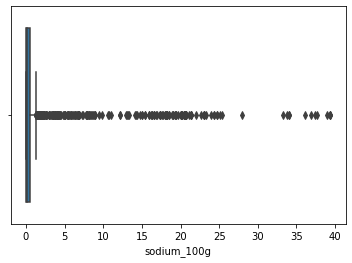

In [152]:
sns.boxplot(x='sodium_100g', data=nutriscore_calcul)

In [155]:
# # Négatif
# def getPtsNeg(row):
#     ptsEnergy = getPts(row['energy_100g'], [335, 336, 670, 1005, 1675, 2010, 2345, 2680, 3015, 3050])
#     ptsGlus = getPts(row['sugars_100g'], [4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45])
#     ptsFat = getPts(row['saturated-fat_100g'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#     ptsNA = getPts(row['sodium_100g'], [0.09, 0.180, 0.270, 0.360, 0.450, 0.540, 0.630, 0.720, 0.810, 0.900])
#     ptsNeg = ptsEnergy + ptsGlus + ptsFat + ptsNA
#     return ptsNeg

In [157]:
def getPtsEnergy(row):
    ptsEnergy = getPts(row['energy_100g'], [335, 336, 670, 1005, 1675, 2010, 2345, 2680, 3015, 3050])
    return ptsEnergy

In [159]:
nutriscore_calcul['pts_energy'] = nutriscore_calcul.apply(getPtsEnergy, axis=1)

ValueError: cannot convert float NaN to integer

In [156]:
nutriscore_calcul['points_neg'] = nutriscore_calcul.apply(getPtsNeg, axis=1)

ValueError: cannot convert float NaN to integer

In [ ]:
# Positif
def getPtsPos(row):
    ptsProt = getPts(row.['proteins_100g'], [1.6, 3.2, 4.8, 6.4, 8])
    ptsFib = getPts(row.['fiber_100g'], [0.9, 1.9, 2.8, 3.7, 4.7])
    ptsVgtx = getPts(row.['fruits-vegetables-nuts_100g'], [40, 41, 60])
    ptsPos = ptsProt + ptsFib + ptsVgtx
    return ptsPos

In [ ]:
nutriscore_table['points_pos'] = nutriscore_table.apply(getPtsPos, axis=1)